## Отчёт по иследовательской работе по программированию (12.02.2020)

Выполнили Ковригин Александр и Панюхин Никита

Импортируем библиотеки и небольшая настройка

In [97]:
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.display import display
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

Функция поиска фразы в тексте

In [98]:
def find(phrase: str, text: str) -> int:
    pattern = r"(\s|^)" + phrase + r"([\;\,\.\s]|$)"
    return len(re.findall(pattern, text))

Считываем файл с фразами

In [99]:
with open("sholohov/_phrases.txt", "r", encoding='utf-8') as file:
    phrases = list(filter(lambda x: x, list(map(lambda x: x.strip().lower(), file.readlines()))))

Константы

In [100]:
NORM = 100000
TARGET_FILE = "don.txt"
DATA_DIRECTORY = "./sholohov/"

Основные переменные

In [101]:
phrases_count = len(phrases)
texts_length = 0
total_values = np.full(phrases_count, 0, float)
target_values = np.full(phrases_count, 0, float)

Обработка текстов и подсчёт

In [102]:
for filename in os.listdir(DATA_DIRECTORY):
    if filename == "_phrases.txt":
        continue

    with open(os.path.join(DATA_DIRECTORY, filename), "r", encoding='utf-8') as file:
        text = file.read().strip().lower()

    texts_length += len(text.split())

    if filename == TARGET_FILE:
        for i in range(phrases_count):
            if text.count(phrases[i]) != 0:
                total_values[i] += find(phrases[i], text)
    else:
        for i in range(phrases_count):
            if text.count(phrases[i]) != 0:
                target_values[i] += find(phrases[i], text)
    print(filename, 'was processed')

bahchevnik.txt was processed
batraki.txt was processed
chervotochina.txt was processed
don.txt was processed
donprodkom.txt was processed
dorozhenka.txt was processed
dvuhmuzhnyaya.txt was processed
ilyuha.txt was processed
kaloshi.txt was processed
kolchak.txt was processed
kolovert.txt was processed
krov.txt was processed
myagkotelyj.txt was processed
nahalenok.txt was processed
obida.txt was processed
pastuh.txt was processed
predsedatel.txt was processed
prodkomissar.txt was processed
rodina.txt was processed
rodinka.txt was processed
semejnyj.txt was processed
semya.txt was processed
serdtse.txt was processed
slovo.txt was processed
step.txt was processed
stezhka.txt was processed
tselina.txt was processed
vrag.txt was processed
yazik.txt was processed
zherebenok.txt was processed


Обработка данных

In [103]:
for i in range(phrases_count):
    total_values[i] *= len(phrases[i]) * NORM / texts_length
    target_values[i] *= len(phrases[i]) * NORM / texts_length

delta = [abs(target_values[i] - total_values[i]) for i in range(len(phrases))]
nums = list(range(len(phrases)))
indexes = [y for x, y in sorted(zip(delta, nums), reverse=True)]

In [104]:
data = np.array(np.array([(phrases[i],
                           total_values[i],
                           target_values[i],
                           delta[i]) for i in indexes]))
df = pd.DataFrame(data=data,
                  columns=['Word',
                           'Average frequency of word occurence (occurences/' + str(NORM) + ' words)',
                           'Target average frequency of word occurence (occurences/' + str(NORM) + ' words)',
                           'Delta (occurences/' + str(NORM) + ' words)'])
display(df)

def f(o):
    return [y for x, y in sorted(zip(delta, o))]
sorted_total_values = f(total_values)
sorted_target_values = f(target_values)
sorted_phrases = f(phrases)

sorted_delta = sorted(delta)

Results with maximum delta []:


,Word,Average frequency of word occurence (occurences/100000 words),Target average frequency of word occurence (occurences/100000 words),Delta (occurences/100000 words)
0,должно,79.21180482211292,40.73749962280093,38.47430519931199
1,видно,114.41705140971865,86.1271211161069,28.289930293611746
2,может быть,37.719907058149005,56.57986058722351,18.859953529074502
3,по всей вероятности,16.722492129112727,0.0,16.722492129112727
4,должно быть,35.95964472876872,19.362885623183157,16.596759105585566
5,очевидно,14.082098635042296,29.170061458301902,15.087962823259605
6,небось,73.93101783397206,61.106249434201395,12.824768399770669
7,наверное,34.19938239938843,46.26975265799612,12.070370258607689
8,видимо,23.386342376052387,12.070370258607683,11.315972117444703
9,чай,7.543981411629802,0.0,7.543981411629802


Вывод графика

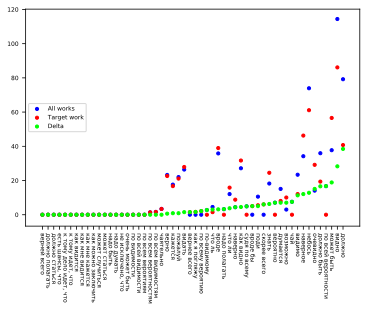

In [107]:
SMALL_SIZE = 6

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=8)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)   # fontsize of the figure title

plt.xticks(rotation=-90)

plt.scatter(sorted_phrases, sorted_total_values, c="#0000ff", s=10).set_label('All works')
plt.scatter(sorted_phrases, sorted_target_values, c="#ff0000", s=10).set_label('Target work')
plt.scatter(sorted_phrases, sorted_delta, c="#00ff00", s=10).set_label('Delta')
plt.legend(loc="center left")
plt.show()

Посмотрев на график и на таблицу результатов, увидим, что слова и фразы "должно", "видно", "может быть" довольно сильно выделяются.